# Polynomial Prediction
 
 Given a polynomial $2x^3 - x^2 + x - 5$, plot the function with Gaussian noise. Use Chi-Squared, MLE, and TensorFlow to predict the polynomial equation and integration to assess accuracy
 

## Graphing Polynomial

A graph of the function $2x^3 - x^2 + x - 5$ with no sigma. For comparison purposes


Area under true polynomial (Trapezoidal Method): -10.673469387755102
Area under true polynomial (Simpsons Method): -10.666666666666668


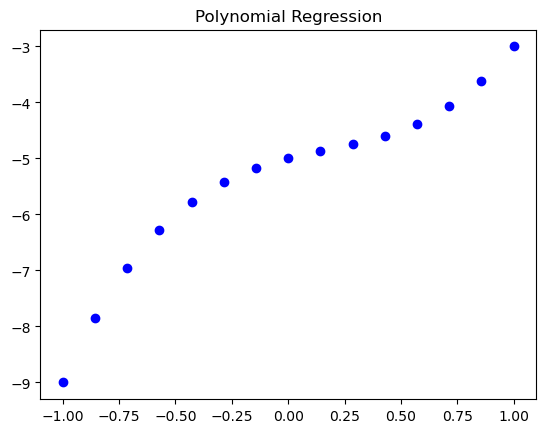

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import trapz
from scipy.integrate import simps

def f(x):
    return 2*(x**3) - (x**2) + x - 5

x_values = np.linspace(start = -1, stop = 1, num = 15)

y_pred = f(x_values) # exact based on the polynomial

plt.scatter(x_values, y_pred, color = 'blue')
plt.title("Polynomial Regression")

trapz_true = trapz(y = y_pred, x = x_values)
simps_true = simps(y = y_pred, x = x_values)

print(f"Area under true polynomial (Trapezoidal Method): {trapz_true}")
print(f"Area under true polynomial (Simpsons Method): {simps_true}")


## Chi Squared Regression

Best-fit parameters (Chi-Squared Minimization): [ 1.97316609 -1.21287325  1.03802739 -4.95547981]
Area under the curve (sigma = 0.1). Area: -10.719541779306597. Error: 1.1901082096817504e-13


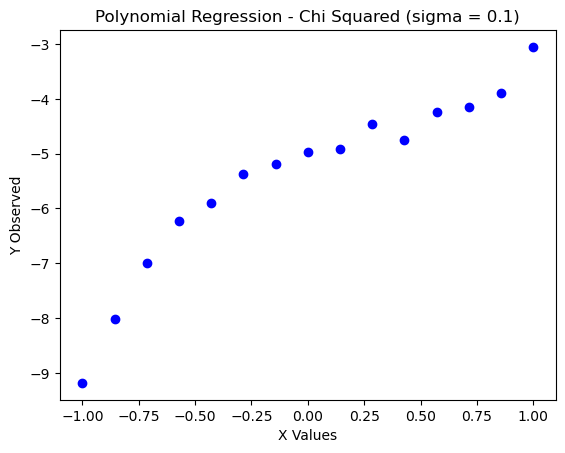

Best-fit parameters (Chi-Squared Minimization): [ 1.3066869  -1.34581943  1.45065125 -4.80278594]
Area under the curve (sigma = 0.3). Area: -10.502784833977028. Error: 1.1660433545365198e-13


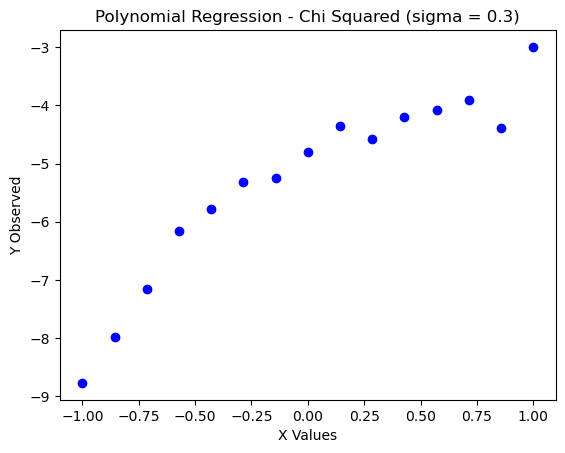

Best-fit parameters (Chi-Squared Minimization): [ 2.14252644 -0.32374705  0.8295781  -5.28455238]
Area under the curve (sigma = 0.5). Area: -10.784936125775435. Error: 1.197368440594752e-13


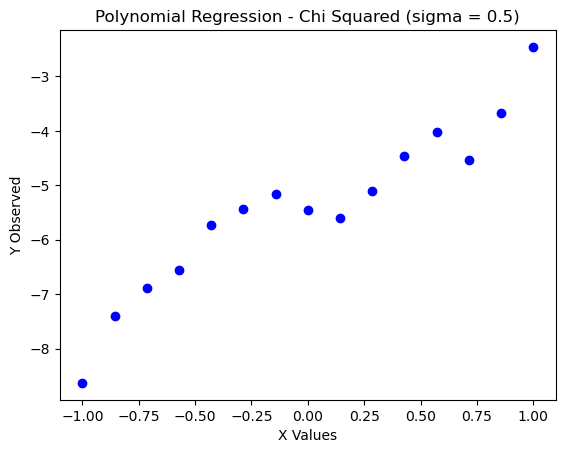

Best-fit parameters (Chi-Squared Minimization): [ 3.00172327 -1.00663834  0.13724417 -5.10210192]
Area under the curve (sigma = 0.7). Area: -10.875296075509372. Error: 1.207400410264611e-13


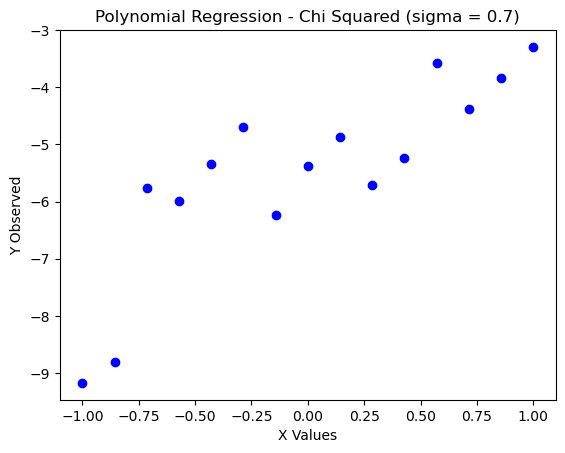

Best-fit parameters (Chi-Squared Minimization): [ 2.3238757  -0.51403205  0.34922699 -5.21668701]
Area under the curve (sigma = 0.9). Area: -10.776062065231464. Error: 1.1963832219609688e-13


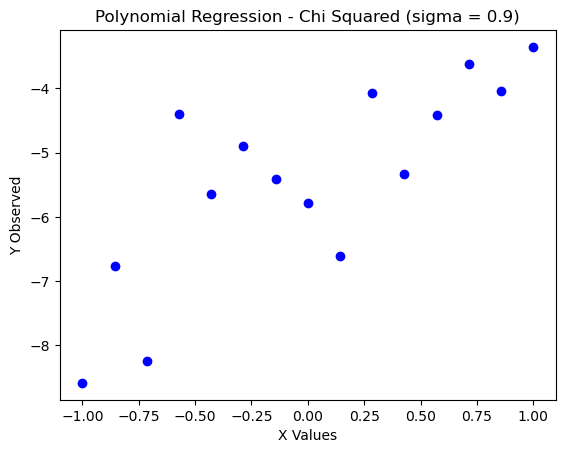

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_chi_squared import PolynomialRegressionChiSquared
from polynomial_integrator import PolynomialIntegrator
# from scipy.integrate import simps
# from scipy.integrate import trapz



# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2

chi_sq_area = np.zeros(5)


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    
    # Create a PolynomialRegressionChiSquared object
    chi_sq = PolynomialRegressionChiSquared(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(chi_sq.x_values, chi_sq.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - Chi Squared (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # Minimize the chi-squared
    try:
        coeffs = chi_sq.minimize_chi_square()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing chi square for sigma = {sigma}: {e}")
    
    if coeffs is not None:
        # Integration using Simpson's Rule
        integrator = PolynomialIntegrator(coeffs)
        area, error = integrator.integrate_polynomial(lower_bound=-1, upper_bound=1)
        chi_sq_area[i] = area
        print(f"Area under the curve (sigma = {chi_sq.sigma:.1f}). Area: {area}. Error: {error}")
    else:
        print(f"Skipping integration for sigma = {sigma} due to error in minimizing chi-square.")

        # Show the plot inline
    plt.show()

## MLE 

Best-fit parameters (MLE): [ 1.78703623 -1.03354615  1.13691269 -4.98103974]
Area under the curve (sigma = 0.1). Area: -10.651110244907846. Error: 1.182510783171758e-13


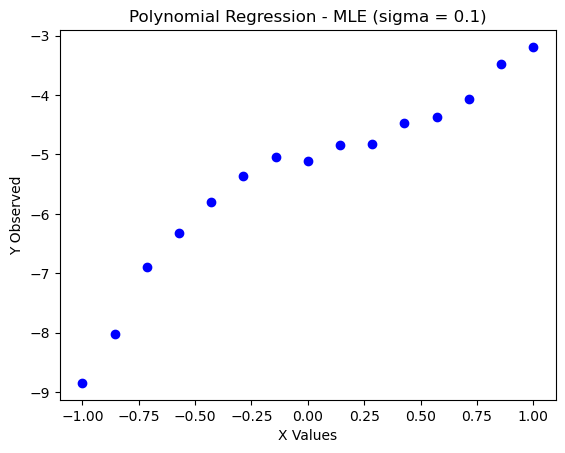

Best-fit parameters (MLE): [ 1.70534601 -1.2035232   1.0426518  -4.89526825]
Area under the curve (sigma = 0.3). Area: -10.592885306308856. Error: 1.1760465164277596e-13


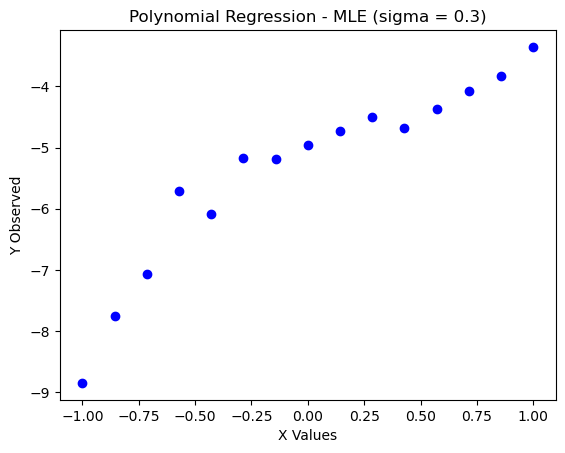

Best-fit parameters (MLE): [ 2.28709027 -0.81369227  0.89068519 -5.16412414]
Area under the curve (sigma = 0.5). Area: -10.870709801736973. Error: 1.2068912315906758e-13


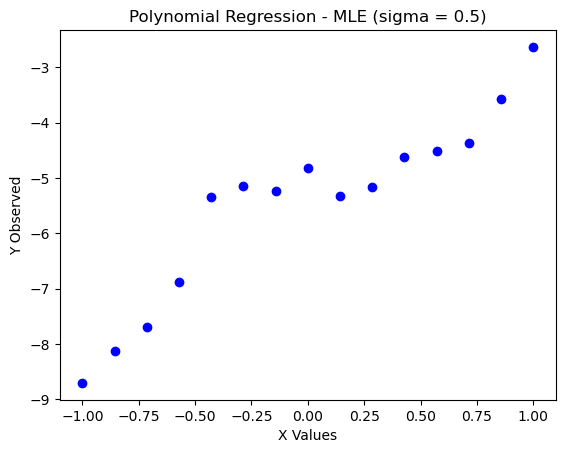

Best-fit parameters (MLE): [ 1.32864756 -1.28638364  1.37541187 -4.90213533]
Area under the curve (sigma = 0.7). Area: -10.661859747277479. Error: 1.183704217675161e-13


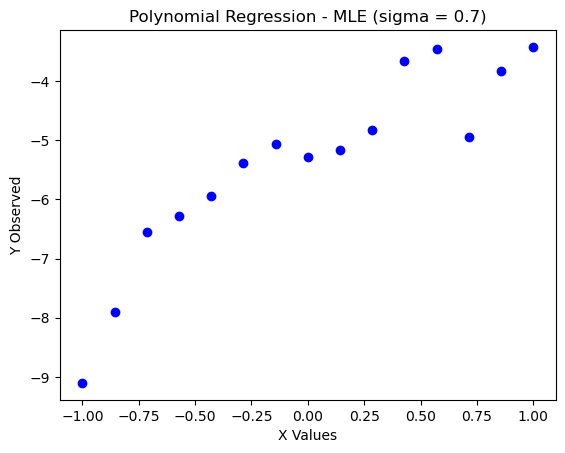

Best-fit parameters (MLE): [ 3.48140179 -1.75188608  0.35770954 -4.7276216 ]
Area under the curve (sigma = 0.9). Area: -10.623167257702441. Error: 1.1794084883945334e-13


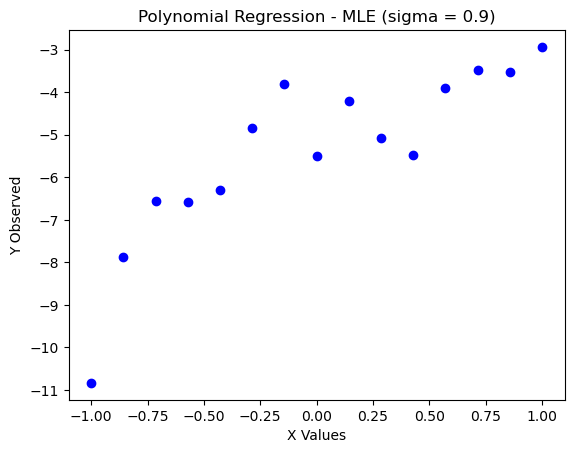

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_mle import PolynomialRegressionMLE
from scipy.integrate import simps
from scipy.integrate import trapz



## arrays to hold area
mle_area = np.zeros(5)

# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    

    mle = PolynomialRegressionMLE(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(mle.x_values, mle.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - MLE (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # minimize MLe
    try:
        coeffs = mle.minimize_mle()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing negative log likelihood for sigma = {sigma}: {e}")
    
    if coeffs is not None:
        # Integration using Simpson's Rule
        integrator = PolynomialIntegrator(coeffs)
        area, error = integrator.integrate_polynomial(lower_bound=-1, upper_bound=1)
        mle_area[i] = area
        print(f"Area under the curve (sigma = {mle.sigma:.1f}). Area: {area}. Error: {error}")
    else:
        print(f"Skipping integration for sigma = {mle.sigma} due to error in MLE.")

    # Show the plot inline
    plt.show()

## Comparing integration acuracy for Chi Squared and MLE

In [18]:
# Define constants
from tabulate import tabulate
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2

data = [chi_sq_simps, chi_sq_trapz, mle_simps, mle_trapz]

row_labels = ['Chi-Squared Simpson', 'Chi-Squared Trapezoid', 'MLE Simpson', 'MLE Trapezoid']

head = np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)
formatted_head = [f"{sigma:.1f}" for sigma in head]


print(tabulate(data, headers = formatted_head, showindex=row_labels))
print()


differential_data = [chi_sq_simps-simps_true, chi_sq_trapz-trapz_true, mle_simps-simps_true, mle_trapz-trapz_true]
print(tabulate(differential_data, headers = formatted_head, showindex=row_labels))

print(f"Area under true polynomial (Trapezoidal Method): {trapz_true}")
print(f"Area under true polynomial (Simpsons Method): {simps_true}")
# for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    
#     print(f"Sigma = {sigma:.1f}")
   
   
    

                            0.1       0.3       0.5       0.7       0.9
---------------------  --------  --------  --------  --------  --------
Chi-Squared Simpson    -10.6834  -10.7311  -11.0852  -10.9285  -10.969
Chi-Squared Trapezoid  -10.6456  -10.6786  -10.9653  -10.753   -11.2231
MLE Simpson            -10.7593  -10.4373  -11.1856  -10.4069  -10.242
MLE Trapezoid          -10.7582  -10.4859  -11.1689  -10.4596  -10.5049

                              0.1          0.3        0.5         0.7        0.9
---------------------  ----------  -----------  ---------  ----------  ---------
Chi-Squared Simpson    -0.0167368  -0.0644793   -0.418564  -0.261829   -0.30237
Chi-Squared Trapezoid   0.0278218  -0.00508469  -0.291817  -0.0795393  -0.54968
MLE Simpson            -0.0926729   0.229382    -0.518888   0.259759    0.424671
MLE Trapezoid          -0.0847071   0.18761     -0.495403   0.213912    0.168537
Area under true polynomial (Trapezoidal Method): -10.673469387755102
Area under true 